### Assignment 3: Python for Analytics

* covers lectures 7-9
* due: November 29th by 6pm.
* Points will be deducted if:
    * Problems are not completed.
    * Portions of problems are not completed.
    * Third party modules where used when the question specified not to do so.
    * The problem was solved in a very inefficient manner.  For instance, copying and pasting the same block of code 10 times instead of using a for loop or using a for loop when a comprehension would work.
    * <span style="color: red;">Each day late will result in a 10% penalty.</span>
    * <span style="color: red;">Not attemping a problem or leaving it blank will result in 0 points for the problem and an additional 5 point deduction.</span>

### Question 1 (15 points)

Use the `CountVectorizer` from `sklearn` on the below `corpus`.

Use the resulting matrix to create a `Kmeans` clustering model.

**Print the feature matrix and the cluster assignments.**

In [3]:
corpus = [
    'This is the first document.', 
    'This document is the second document.',
    'And this is the third one.', 
    'Is this the first document?',
]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [8]:
vectorizer = CountVectorizer()
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
cvect_data = vectorizer.fit_transform(corpus)
cvect_data.toarray()
vectorizer.get_feature_names()
cvect_df = pd.DataFrame(cvect_data.toarray(), columns = vectorizer.get_feature_names())
cvect_df

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [10]:
from sklearn.cluster import KMeans
from collections import Counter

In [20]:
kmeans = KMeans(3)
kmeans.fit(cvect_df)
yhat = kmeans.predict(cvect_df)
print(yhat)
c = Counter(yhat)
print(c)

[2 0 1 2]
Counter({2: 2, 0: 1, 1: 1})


### Question 2 (15 points)

Make a UDF that takes as inputs:

* matrix of data (could be a `numpy` `array` or a `pandas` `DataFrame`.)
* a param that indicates how to normalizes the data 

The UDF should be able to normalize data using `StandardScaler`, `MinMaxScaler` or `scale` from `sklearn`.  

Use an assert to check that the user has entered a valid normalization technique (one of the above 3).

**Test this using the Iris data for one of the normalization types.  Print the describe of the resulting dataframe.**

In [13]:
from sklearn.datasets import load_iris
import numpy as np

iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df = iris_df.drop('target',1)

C:\Users\dzfal\AppData\Local\Temp\ipykernel_7684\4015195968.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  iris_df = iris_df.drop('target',1)


In [99]:
iris_df
species = iris_df["species"]

In [100]:
iris_df1 = iris_df.drop(columns=['species'])

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

In [102]:
def normalizeData(data, param):
    assert param == "StandardScaler" or param == "MinMaxScaler" or param == "scale", "Please enter the correct normalization type"
    if param == "StandardScaler":
        scaler = StandardScaler()
        scaler.fit(data)
        data_scaler = scaler.transform(data)
        data_scale_df = pd.DataFrame(data_scaler, columns = data.columns)
        data_scale_df["species"] = species
        print(data_scale_df.describe())
        print(data_scale_df)
    elif param == "MinMaxScaler":
        minmax = MinMaxScaler()
        minmax.fit(data)
        data_minmax = minmax.transform(data)
        data_minmax = pd.DataFrame(data_minmax, columns = data.columns)
        data_minmax["species"] = species
        print(data_minmax.describe())
        print(data_minmax)
    else:
        scaled_data = scale(data)
        data_scale = pd.DataFrame(scaled_data, columns = data.columns)
        data_scale["species"] = species
        print(data_scale.describe())
        print(data_scale)

In [103]:
param = "StandardScaler"
normalizeData(iris_df1, param)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -1.690315e-15     -1.842970e-15      -1.698641e-15   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -1.409243e-15  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00  
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0            -0.900681          1.019004          -1.340227         -1.315444   
1            -1.14

In [104]:
param = "Stand"
normalizeData(iris_df1, param)

AssertionError: Please enter the correct normalization type

### Question 3 (15 points)

Make an 80% training set of data and a 20% test set of data using the Boston Housing dataset.  The data can be split using `sklearn` functionality.

Create a `LinearRegression`, predicting the `MEDV` column in the dataset.  Train your model on the training dataset.

Use the model to make preditions using your test and train data.

Calculate the RMSE and MSE for both the training and test datasets.

Create a scatter plot of the test values for `MEDV` and the predicted values.

**Print the MSE and RMSE for the train and test and the scatter plot.**

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
import pandas as pd

In [75]:
boston_dataset = load_boston()
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target

E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [76]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [80]:
x = boston.drop(["MEDV"],1)
y = boston["MEDV"]

C:\Users\dzfal\AppData\Local\Temp\ipykernel_8972\643803312.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = boston.drop(["MEDV"],1)


In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [83]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [87]:
from sklearn.metrics import mean_squared_error

**RMSE and MSE for training set**

In [86]:
y_boston_train_hat = lr.predict(x_train)

In [91]:
mse_train = mean_squared_error(y_train, y_boston_train_hat)
mse_train

21.641412753226312

In [93]:
rmse_train = np.sqrt(mse_train)
rmse_train

4.6520331848801675

**RMSE and MSE for test set**

In [94]:
y_boston_test_hat = lr.predict(x_test)

In [95]:
mse_test = mean_squared_error(y_test, y_boston_test_hat)
mse_test

24.291119474973456

In [96]:
rmse_test = np.sqrt(mse_test)
rmse_test

4.928602182665331

**Scatter Plot**

In [122]:
import matplotlib.pyplot as plt

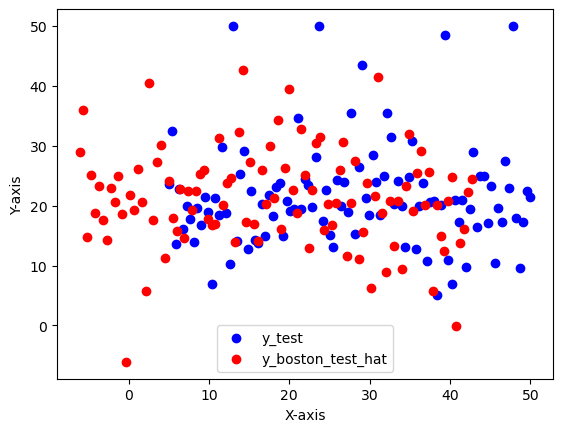

In [131]:
x1 = np.linspace(y_test.min(), y_test.max(), len(y_test))
x2 = np.linspace(y_boston_test_hat.min(), y_boston_test_hat.max(), len(y_boston_test_hat))
plt.scatter(x1, y_test, c ="blue")
plt.scatter(x2, y_boston_test_hat, c ="red")
plt.legend(["y_test" , "y_boston_test_hat"])
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

### Question 4 (15 points)


Run a `GridSearch` on a `DecisionTreeClassifier` using the Iris dataset.  Pick 3 params and have 2 values for each param in your param_grid.  Use  3 fold cross validation.  

**Print the validation metrics and the best params out.**

In [106]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [110]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [117]:
param_map = {
'criterion':('gini', 'entropy'),
"max_depth":[5,7],
"min_samples_split":[2,3]
}

x = iris_df.drop(["species"],1)
y = iris_df["species"]

C:\Users\dzfal\AppData\Local\Temp\ipykernel_8972\1044542127.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = iris_df.drop(["species"],1)


In [118]:
scale = 100
big_x = pd.concat([x] * scale)
big_y = pd.concat([y] * scale)
print(big_x.shape)
print(big_y.shape)

(15000, 4)
(15000,)


In [119]:
clf = DecisionTreeClassifier()
gs = GridSearchCV(clf, param_map, cv=3, verbose = 1, n_jobs = 4)
gs.fit(big_x, big_y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy'), 'max_depth': [5, 7],
                         'min_samples_split': [2, 3]},
             verbose=1)

In [120]:
gs.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}

### Quesiton 5 (15 points)

Each inner list in `transactions` is an item a user bought.  For instance, `[A|item_a]` means user `A` bought `item_a`.

Make a generator that parses the list of transaction data.

Put the contents in a dictionary where the key is the user id and the value is the list of items the user has purchased.

Note, this is very similar to a problem on homework 1, except instead of looping through a list, you will somehow have to loop through a generator.  To parse, you will also have to access the first item in each inner list element, and use `split()` to parse the string and get the user id and item.

**Print the dictionary out.**

In [157]:
transactions = [
    ["A|item_a"],
    ["B|item_a"],
    ["C|item_a"],
    ["C|item_b"],
    ["C|item_c"],
    ["B|item_c"],
    ["D|item_b"],
    ["D|item_b"]
]

In [158]:
gen = (item for item in transactions)

In [159]:
my_dic = {}
for i in gen:
    user, item = i[0].split('|')
    if user in my_dic:
        my_dic[user].append(item)
    else:
        my_dic[user] = [item]
my_dic

{'A': ['item_a'],
 'B': ['item_a', 'item_c'],
 'C': ['item_a', 'item_b', 'item_c'],
 'D': ['item_b', 'item_b']}

### Question 6 (10 points)

The below snippets  of code will scrape the paragraph content from the below Wikepedia url.

In [160]:
url = "https://en.wikipedia.org/wiki/Illinois"

In [164]:
import urllib
from bs4 import BeautifulSoup

In [165]:
mybytes = urllib.request.urlopen(url)
mybytes = mybytes.read().decode("utf8")

parsed_html = BeautifulSoup(mybytes, features="lxml")

In [166]:
paragraph_data = [i.text for i in parsed_html.find_all("p")]
paragraph_data = " ".join(paragraph_data).strip()
paragraph_data[0:500]

"Illinois (/ˌɪləˈnɔɪ/ (listen) IL-ə-NOY) is a state in the Midwestern United States. Chicago is its largest city, and the state's capital is Springfield; other major metropolitan areas include Metro East (of Greater St. Louis), Peoria and Rockford. Of the fifty U.S. states, Illinois has the fifth-largest gross domestic product (GDP), the sixth-largest population, and the 25th-largest land area.\n Illinois has a highly diverse economy, with the global city of Chicago in the northeast, major industr"

Create a udf that returns the pargraph data from a given Wikipedia url.  

Map the udf to a list of 5 wiki (your choice of which wikis, though I'm sad to say Brian Craft doesn't have his own wiki) urls using a `threadpoolexecutor` or the `multiprocessing` module.  

If you are unable to get the code to work in jupyter, then copy and paste the code you created, and include a comment indicating you couldn't get it to run.  You will not be penalized.

For one of the wikis, print out the first 500 characters of the paragraph data.

In [24]:
import multiprocessing as mp

In [2]:
def getText(url):
    mybytes = urllib.request.urlopen(url)
    mybytes = mybytes.read().decode("utf8")
    parsed_html = BeautifulSoup(mybytes, features="lxml")
    paragraph_data = [i.text for i in parsed_html.find_all("p")]
    paragraph_data = " ".join(paragraph_data).strip()
    return paragraph_data[0:500]

In [ ]:
pool = mp.Pool(4)
my_url = [
    "https://en.wikipedia.org/wiki/Elon_Musk",
    "https://en.wikipedia.org/wiki/Donald_Trump",
    "https://en.wikipedia.org/wiki/Kim_Jong-un",
    "https://en.wikipedia.org/wiki/Shinzo_Abe",
    "https://en.wikipedia.org/wiki/Hunan_cuisine"
]
results = pool.map(getText, my_url)
results

### Question 7 (15 points)

Find all the possible combinations of the below user lists.   Hint, this can be done using the `combinations` function from `itertools`.  The output should be list of tuples, like `[(a,b), (b,c)...]`.

To the resulting list of tuples, use `multiprocessing` to map a function that finds the euclidean distances of each combination, using the below `vectors` dictionary.  Hint, the udf should return a tuple of 3 items, the first 2 being the user ids and the third being the euclidean distance, like `(a,b 2.23223)`.  Note this distance is made up.

Put the results in a `pandas` `DataFrame` and find the 2 most similar users.  Do not include comparisons against a user to themselves.  Remove these from the list of tuples prior to mapping the function.

If you are unable to get the `multiprocessing` module to work, then copy and paste the code you created, and include a comment indicating you couldn't get it to run.  You will not be penalized.

**Print out the top 5 rows of the dataframe, sorting from closest to least similar.**

In [3]:
users = ["a", "b", "c", "d"]

vectors = {
    "a": [1,2,2,1],
    "b": [2,4,2,1],
    "c": [5,4,2,4],
    "d": [5,3,2,1]
}

In [9]:
from itertools import combinations
comb = combinations(users, 2)
comb_lst = list(comb)
comb_lst

[('a', 'b'), ('a', 'c'), ('a', 'd'), ('b', 'c'), ('b', 'd'), ('c', 'd')]

In [22]:
def userDistance(user_tuple):
    user1 = user_tuple[0]
    user2 = user_tuple[1]
    dist = np.linalg.norm(np.asarray(vectors[user1])-np.asarray(vectors[user2]))
    return (user1, user2, dist)
a = comb_lst[0]
userDistance(a)

('a', 'b', 2.23606797749979)

In [ ]:
pool = mp.Pool(4)
results = pool.map(userDistance, comb_lst)